In [1]:
import torch
from torch import nn
import numpy as np
import pandas
from torch.utils.data import Dataset, DataLoader
import time
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (10,6)

pandas.set_option('precision', 20)

In [2]:
class Network(nn.Module):
        def __init__(self):
                super().__init__()

                # Layer sizes
                self.input = nn.Linear(6, 100)
                self.first_hidden = nn.Linear(100, 250)
                self.second_hidden = nn.Linear(250, 500)
                self.third_hidden = nn.Linear(500, 250)
                self.fourth_hidden = nn.Linear(250, 100)
                self.fifth_hidden = nn.Linear(100, 50)
                self.output = nn.Linear(50, 1)

                # Activation functions
                self.relu = nn.ReLU()
                self.sigmoid = nn.Sigmoid()

        def forward(self, x:[])->[]:
                x = self.input(x)
                x = self.relu(x)
                x = self.first_hidden(x)
                x = self.relu(x)
                x = self.second_hidden(x)
                x = self.relu(x)
                x = self.third_hidden(x)
                x = self.relu(x)
                x = self.fourth_hidden(x)
                x = self.relu(x)
                x = self.fifth_hidden(x)
                x = self.relu(x)            
                x = self.output(x)

                return x

In [5]:
def get_normalized_data_point(theta, pitch, duty_cycle, fill_factor, wavelength, mode)->torch.tensor:
    wavelengths = np.linspace(1.3*10**(-6), 1.7*10**(-6), 200)
    
    fill_factor = (fill_factor - dataframe.min()['Fill Factor'])/\
    (dataframe.max()['Fill Factor'] - dataframe.min()['Fill Factor'])
    
    pitch = (pitch - dataframe.min()['Pitch'])/(dataframe.max()['Pitch'] - dataframe.min()['Pitch'])
    
    theta = (theta - dataframe.min()['Theta'])/(dataframe.max()['Theta'] - dataframe.min()['Theta'])
    
    duty_cycle = (duty_cycle - dataframe.min()['Duty Cycle'])/(dataframe.max()['Duty Cycle'] - dataframe.min()['Duty Cycle'])
    
    wavelength = (wavelength - min(wavelengths))/(max(wavelengths) - min(wavelengths))
    
    return torch.tensor([theta, pitch, duty_cycle, fill_factor, wavelength, mode], dtype=torch.float32)


def get_transmission_val(nn_val)->float:
    return np.power(10, nn_val.detach().numpy())

In [17]:
three_hidden_layers = torch.load('DATASETS/GratingCouplerNetModel_three_hidden').eval()
four_hidden_layers = torch.load('DATASETS/GratingCouplerNetModel_four_hidden').eval()
five_hidden_layers = torch.load('DATA_FILES/GratingCouplerNetModel').eval()
five_hidden_layers_new = torch.load('DATASETS/GratingCouplerNetModel_five_hidden').eval()

In [25]:
three_hidden_layers = torch.load('DATASETS/GratingCouplerNetModel_three_hidden_24March2022').eval()
four_hidden_layers = torch.load('DATASETS/GratingCouplerNetModel_four_hidden_24March2022').eval()
five_hidden_layers = torch.load('DATASETS/GratingCouplerNetModel_five_hidden_24March2022').eval()

In [20]:
# Full dataset (including training and testing sets)
dataframe = pandas.read_csv('DATASETS/NOISE/TRAINING_24March2022_UNNORMED.csv')
dataframe

,Theta,Pitch,Duty Cycle,Fill Factor,Mode,Lambda,Transmission
0,5.0,0.00000050,0.40000000000000002220,0.20000000000000001110,0,0.00000170000,0.00009103400000000000
1,5.0,0.00000050,0.40000000000000002220,0.20000000000000001110,0,0.00000169817,0.00010104600000000001
2,5.0,0.00000050,0.40000000000000002220,0.20000000000000001110,0,0.00000169635,0.00011188100000000001
3,5.0,0.00000050,0.40000000000000002220,0.20000000000000001110,0,0.00000169453,0.00012333200000000000
4,5.0,0.00000050,0.40000000000000002220,0.20000000000000001110,0,0.00000169271,0.00013515599999999999
...,...,...,...,...,...,...,...
2240395,11.0,0.00000151,0.44444400000000000572,0.55555600000000004979,1,0.00000131000,-0.00080868699999999999
2240396,11.0,0.00000151,0.44444400000000000572,0.55555600000000004979,1,0.00000130000,-0.00084836399999999989
2240397,11.0,0.00000151,0.44444400000000000572,0.55555600000000004979,1,0.00000130000,-0.00088449199999999996
2240398,11.0,0.00000151,0.44444400000000000572,0.55555600000000004979,1,0.00000130000,-0.00094034800000000003


In [169]:
# Training statistics for the models
training_statistics = pandas.read_csv('DATA_FILES/training_stats_03March2022.csv')
training_statistics2 = pandas.read_csv('DATA_FILES/training_stats_16March2022.csv')
training_statistics3 = pandas.read_csv('DATA_FILES/training_stats_22March2020.csv')
training_statistics4 = pandas.read_csv('DATA_FILES/training_stats_22March2020_fourth_hidden.csv')

In [491]:
training_statistics_three = pandas.read_csv('DATASETS/training_stats_22March2022_three_hidden.csv')
training_statistics = pandas.read_csv('DATASETS/training_stats_22March2022_four_hidden.csv')
training_statistics_five = pandas.read_csv('DATA_FILES/training_stats_03March2022.csv')
training_statistics_five_new = pandas.read_csv('DATASETS/training_stats_22March2022_five_hidden.csv')

In [511]:
training_statistics_three = pandas.read_csv('DATASETS/training_stats_three_hidden_24March2022.csv')
training_statistics_four = pandas.read_csv('DATASETS/training_stats_four_hidden_24March2022.csv')
training_statistics_five = pandas.read_csv('DATASETS/training_stats_five_hidden_24March2022.csv')

In [11]:
# Validation sets
dusan_paper_TM = pandas.read_csv('TEST_SIMULATIONS/Dusans_Plot_TM_mode.txt')
dusan_paper_TE = pandas.read_csv('TEST_SIMULATIONS/Dusans_Plot_TE_mode.txt')
test_TM = pandas.read_csv('TEST_SIMULATIONS/Testing_TM.txt')
test_TE = pandas.read_csv('TEST_SIMULATIONS/Testing_TE.txt')
test_TM2 = pandas.read_csv('TEST_SIMULATIONS/Testing_TM_2.txt')
test_TE2 = pandas.read_csv('TEST_SIMULATIONS/Testing_TE_2.txt')
test_TM3 = pandas.read_csv('TEST_SIMULATIONS/Testing_TM_3.txt')
test_TE3 = pandas.read_csv('TEST_SIMULATIONS/Testing_TE_3.txt')
test_TM5 = pandas.read_csv('TEST_SIMULATIONS/TM5.txt')
test_TE5 = pandas.read_csv('TEST_SIMULATIONS/TE5.txt')
test_TM6 = pandas.read_csv('TEST_SIMULATIONS/TM6.txt')
test_TE6 = pandas.read_csv('TEST_SIMULATIONS/TE6.txt')
test_TM7 = pandas.read_csv('TEST_SIMULATIONS/TM7.txt')
test_TE7 = pandas.read_csv('TEST_SIMULATIONS/TE7.txt')
test_TM8 = pandas.read_csv('TEST_SIMULATIONS/TM8.txt')
test_TE8 = pandas.read_csv('TEST_SIMULATIONS/TE8.txt')

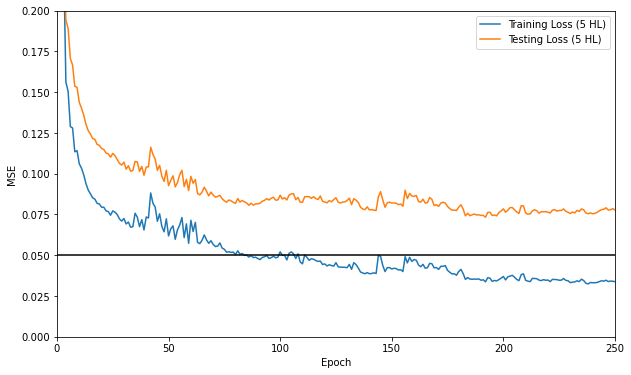

In [514]:
# plt.plot(training_statistics_three['training_loss_mse'], label='Training Loss (3 HL)')
# plt.plot(training_statistics_three['testing_loss_mse'], label='Testing Loss (3 HL)')

# plt.plot(training_statistics['training_loss_mse'], label='Training Loss (4 HL)')
# plt.plot(training_statistics['testing_loss_mse'], label='Testing Loss (4 HL)')

# # plt.plot(training_statistics_five['training_loss'], label='Training Loss')
# # plt.plot(training_statistics_five['testing_loss'], label='Testing Loss')

# plt.plot(training_statistics_five_new['training_loss_mse'], label='Training Loss (5 HL)')
# plt.plot(training_statistics_five_new['testing_loss_mse'], label='Testing Loss (5 HL)')

# plt.plot(training_statistics_three['training_loss_mse'], label='Training Loss (3 HL)')
# plt.plot(training_statistics_three['testing_loss_mse'], label='Testing Loss (3 HL)')

# plt.plot(training_statistics_four['training_loss_mse'], label='Training Loss (4 HL)')
# plt.plot(training_statistics_four['testing_loss_mse'], label='Testing Loss (4 HL)')

plt.plot(training_statistics_five['training_loss_mse'], label='Training Loss (5 HL)')
plt.plot(training_statistics_five['testing_loss_mse'], label='Testing Loss (5 HL)')

plt.axhline(y=0.05, color='k', linestyle='-')

plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.axis([0, 250, 0, 0.2])
plt.legend()

Text(0, 0.5, 'Training Time (mins)')

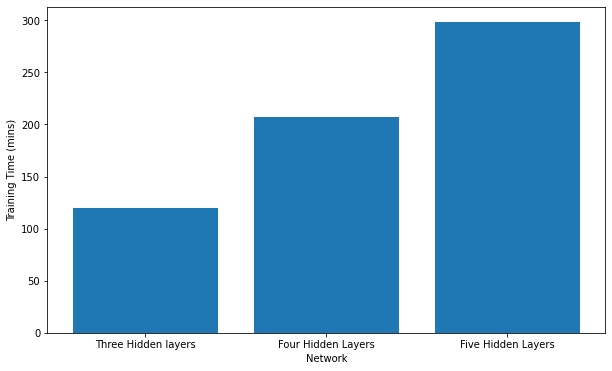

In [522]:
# Three hidden layers: Input: (6, 50) -> (50, 50) -> (50, 100) -> (100, 100) -> Output(100, 1) 
# Four hidden layers: Input: (6, 50) -> (50, 100) -> (100, 250) -> (250, 100) -> (100, 50) -> Output: (50, 1)
# Five hidden layers:  Input: (6, 100) -> (100, 250) -> (250, 500) -> (500, 250) -> (250, 100) -> (100, 50) -> Output: (50, 1)
# Six hidden layers: Input: (6, 100) -> (100, 250) -> 
#                                       (250, 500) -> 
#                                       (500, 750) -> 
#                                       (750, 500) -> 
#                                       (500, 250) -> 
#                                       (250, 100) -> Output: (100, 1)
data = {'Three Hidden layers': 119.498, 'Four Hidden Layers': 207.622 ,'Five Hidden Layers': 298.174}
networks = list(data.keys())
training_minutes = list(data.values())
plt.bar(networks, training_minutes)
plt.xlabel('Network')
plt.ylabel('Training Time (mins)')

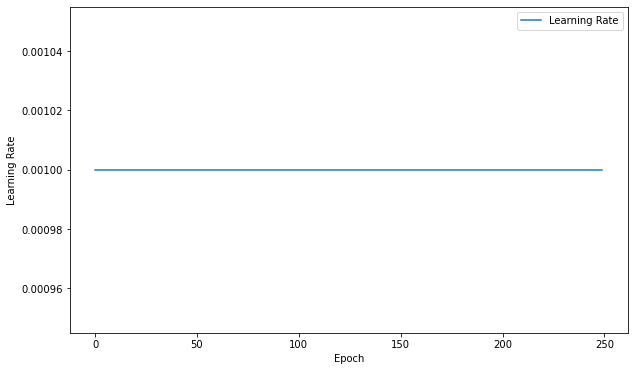

In [13]:
plt.plot(training_statistics['learning_rate'], label='Learning Rate')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.legend()

In [14]:
# Validation at low vals
theta = (5)
pitch = (0.7*10**(-6))
duty_cycle = (0.48)
fill_factor = (0.2)
wavelength = np.linspace(1.3*10**(-6), 1.7*10**(-6), 200)

transmission_TM = np.zeros(len(wavelength))
transmission_TE = np.zeros(len(wavelength))

for i in range(len(wavelength)):
    x = get_normalized_data_point(theta, pitch, duty_cycle, fill_factor, wavelength[i], 1)
    transmission_TM[i] = get_transmission_val(five_hidden_layers(x))
    
    x = get_normalized_data_point(theta, pitch, duty_cycle, fill_factor, wavelength[i], 0)
    transmission_TE[i] = get_transmission_val(five_hidden_layers(x))

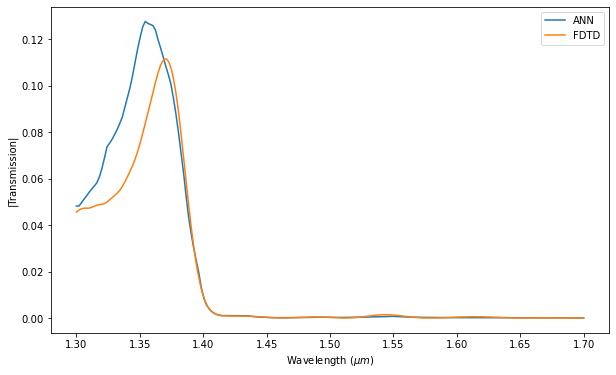

In [15]:
plt.plot(wavelength/10**(-6), np.abs(transmission_TE), label='ANN')
plt.plot(np.flip(test_TE5['X'])/10**(-6), np.abs(np.flip(test_TE5['Y'])), label='FDTD')
plt.xlabel('Wavelength ' + r'$(\mu m)$')
plt.ylabel('|Transmission|')
plt.legend()

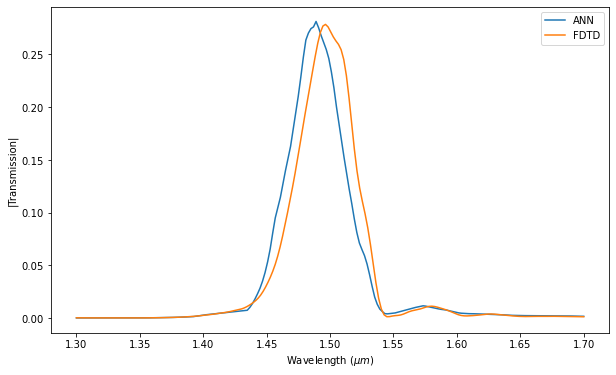

In [16]:
plt.plot(wavelength/10**(-6), np.abs(transmission_TM), label='ANN')
plt.plot(np.flip(test_TM5['X'])/10**(-6), np.abs(np.flip(test_TM5['Y'])), label='FDTD')
plt.xlabel('Wavelength ' + r'$(\mu m)$')
plt.ylabel('|Transmission|')
plt.legend()

In [26]:
theta = (14.375)
pitch = (0.75*10**(-6))
duty_cycle = (0.65)
fill_factor = (0.25)
wavelength = np.linspace(1.3*10**(-6), 1.7*10**(-6), 200)

transmission_TM = np.zeros(len(wavelength))
transmission_TE = np.zeros(len(wavelength))

for i in range(len(wavelength)):
    x = get_normalized_data_point(theta, pitch, duty_cycle, fill_factor, wavelength[i], 1)
    transmission_TM[i] = get_transmission_val(five_hidden_layers(x))
    
    x = get_normalized_data_point(theta, pitch, duty_cycle, fill_factor, wavelength[i], 0)
    transmission_TE[i] = get_transmission_val(five_hidden_layers(x))

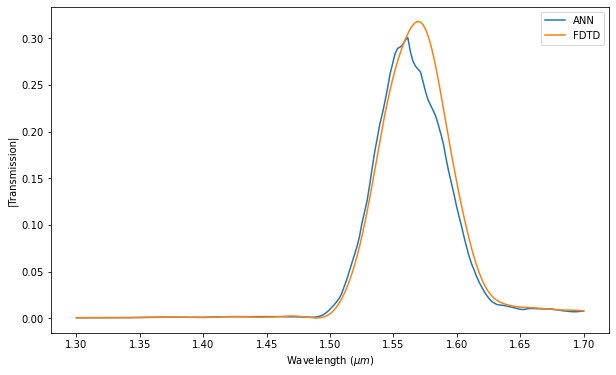

In [27]:
plt.plot(wavelength/10**(-6), np.abs(transmission_TM), label='ANN')
plt.plot(np.flip(dusan_paper_TM['X'])/10**(-6), np.abs(np.flip(dusan_paper_TM['Y'])), label='FDTD')
plt.xlabel('Wavelength ' + r'$(\mu m)$')
plt.ylabel('|Transmission|')
plt.legend()

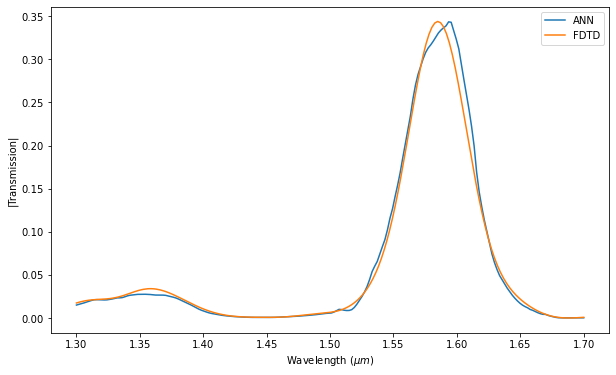

In [28]:
plt.plot(wavelength/10**(-6), transmission_TE, label='ANN')
plt.plot(np.flip(dusan_paper_TE['X'])/10**(-6), np.abs(np.flip(dusan_paper_TE['Y'])), label='FDTD')
plt.xlabel('Wavelength ' + r'$(\mu m)$')
plt.ylabel('|Transmission|')
plt.legend()

In [550]:
# Set up the parameters for a sweep
# Optimize the transmission for the TE mode at 1.55 um
thetas = np.linspace(dataframe.min()['Theta'], dataframe.max()['Theta'], 10)
pitchs = np.linspace(dataframe.min()['Pitch'], dataframe.max()['Pitch'], 10)
duty_cycles = np.linspace(dataframe.min()['Duty Cycle'], dataframe.max()['Duty Cycle'], 10)
fill_factors = np.linspace(dataframe.min()['Fill Factor'], dataframe.max()['Fill Factor'], 10)
mode = 0
wavelength = 1.55*10**(-6)

max_val = 0;
params = [0, 0, 0, 0]
mode = 0
count = 1

for theta in thetas:
    for pitch in pitchs:
        for duty_cycle in duty_cycles:
            for fill_factor in fill_factors:
                x = get_normalized_data_point(theta, pitch, duty_cycle, fill_factor, wavelength, mode)
                if max_val < get_transmission_val(five_hidden_layers(x)):
                    max_val = get_transmission_val(five_hidden_layers(x))
                    params[0] = theta
                    params[1] = pitch
                    params[2] = duty_cycle
                    params[3] = fill_factor
                count = count + 1
print(params, max_val)

[13.333333333333334, 7.244444444444444e-07, 0.5777777777777778, 0.5111111111111111] [0.40614742]


In [552]:
theta = (13.3333)
pitch = (0.72444444*10**(-6))
duty_cycle = (0.577778)
fill_factor = (0.511111)
wavelength = np.linspace(1.3*10**(-6), 1.7*10**(-6), 200)

transmission_TM = np.zeros(len(wavelength))
transmission_TE = np.zeros(len(wavelength))

for i in range(len(wavelength)):
    x = get_normalized_data_point(theta, pitch, duty_cycle, fill_factor, wavelength[i], 1)
    transmission_TM[i] = np.power(10, five_hidden_layers(x).detach().numpy())
    
    x = get_normalized_data_point(theta, pitch, duty_cycle, fill_factor, wavelength[i], 0)
    transmission_TE[i] = np.power(10, five_hidden_layers(x).detach().numpy())

In [532]:
max(transmission_TE)

0.31474918127059937

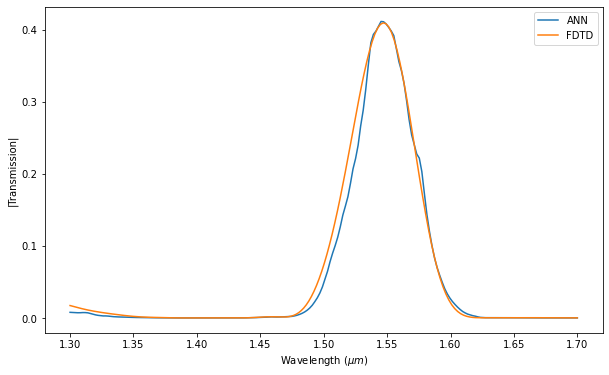

In [554]:
plt.plot(wavelength/10**(-6), transmission_TE, label='ANN')
plt.plot(np.flip(test_TE8['X'])/10**(-6), np.abs(np.flip(test_TE8['Y'])), label='FDTD')
plt.xlabel('Wavelength ' + r'$(\mu m)$')
plt.ylabel('|Transmission|')
plt.legend()

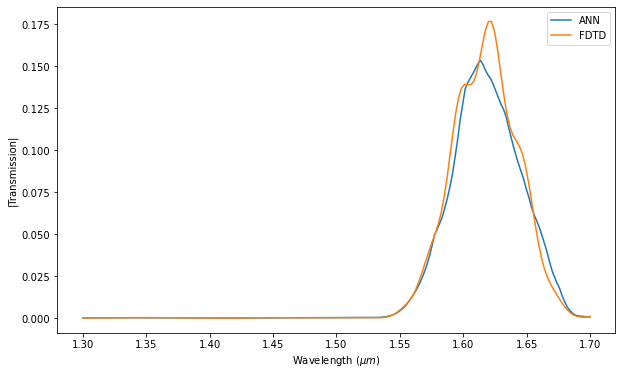

In [555]:
plt.plot(wavelength/10**(-6), transmission_TM, label='ANN')
plt.plot(np.flip(test_TM8['X'])/10**(-6), np.abs(np.flip(test_TM8['Y'])), label='FDTD')
plt.xlabel('Wavelength ' + r'$(\mu m)$')
plt.ylabel('|Transmission|')
plt.legend()

The network is also trying to learn noise patterns, which we realized are meaningless

In [134]:
theta = (8.5)
pitch = (0.886*10**(-6))
duty_cycle = (0.8)
fill_factor = (0.6)
wavelength = np.linspace(1.3*10**(-6), 1.7*10**(-6), 200)

transmission_TM = np.zeros(len(wavelength))
transmission_TE = np.zeros(len(wavelength))

for i in range(len(wavelength)):
    x = get_normalized_data_point(theta, pitch, duty_cycle, fill_factor, wavelength[i], 1)
    transmission_TM[i] = get_transmission_val(GratingCouplerNet(x))
    
    x = get_normalized_data_point(theta, pitch, duty_cycle, fill_factor, wavelength[i], 0)
    transmission_TE[i] = get_transmission_val(GratingCouplerNet(x))

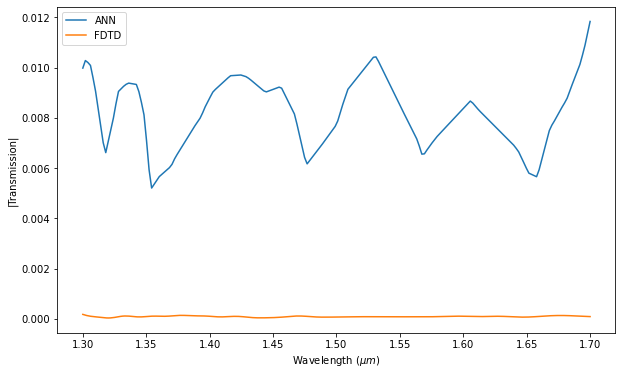

In [136]:
plt.plot(wavelength/10**(-6), np.abs(transmission_TM), label='ANN')
plt.plot(np.flip(test_TM2['X'])/10**(-6), np.abs(np.flip(test_TM2['Y'])), label='FDTD')
plt.xlabel('Wavelength ' + r'$(\mu m)$')
plt.ylabel('|Transmission|')
plt.legend()

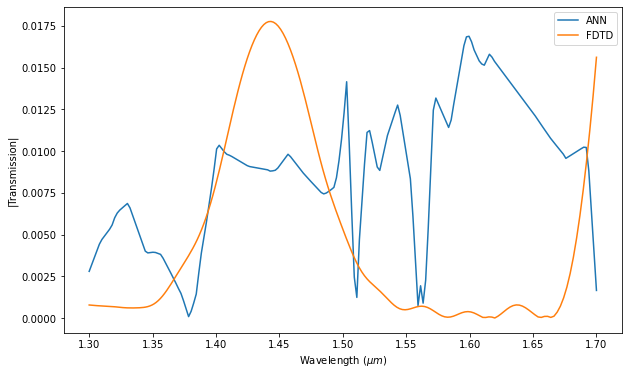

In [137]:
plt.plot(wavelength/10**(-6), np.abs(transmission_TE), label='ANN')
plt.plot(np.flip(test_TE2['X'])/10**(-6), np.abs(np.flip(test_TE2['Y'])), label='FDTD')
plt.xlabel('Wavelength ' + r'$(\mu m)$')
plt.ylabel('|Transmission|')
plt.legend()